# 1. 벡터와 벡터의 기본 연산

### (Numpy 활용 vector 생성 및 시각화, vector operation, python broadcasting, scalar-vector(multiplication, addition), unit vector, norm, dot product, cross product, hardamard product, orthogonal discomposition)

In [3]:
# 코드 구현에 필요한 numpy, matplotlib import
%pip install --upgrade pip
%pip install numpy
%pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':10}) # set global font size

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# 1. 백터 생성 (Creating vectors)

In [4]:
# 파이썬 리스트 타입의 벡터를 생성 (방향성이 없는 경우 1차원으로 간주) - a vector as a Python list datatype
asList = [1,2,3]

# []를 통해서 표현하면 행백터를 의미함 - same numbers, but as a dimensionless numpy array
asArray = np.array([1,2,3])

# [].[].[]를 통해 다중으로 표기하면 열 vector로 인식한다. again same numbers, but now endowed with orientations
rowVec = np.array([ [1,2,3] ]) # row
colVec = np.array([ [1],[2],[3] ]) # column

# Note the use of spacing when defining the vectors; that is not necessary but makes the code more readable.
# 일반적으로 코딩할 경우에는 row/column vector인지 표기할 필요는 없지만, 추후에 오류가 발생할 경우에는 디버깅이 편하기 때문에 가급적이면 표기하는 습관을 들이자

In [5]:
# Check the sizes of the variables
# 위에서 만들었던 vector들의 shape을 확인 가능하다 (np.shape(), .shape 모두 사용 가능함)

print(f'asList:  {np.shape(asList)}') # using np's shape function
print(f'asArray: {asArray.shape}') # using a method associated with numpy objects
print(f'rowVec:  {rowVec.shape}')
print(f'colVec:  {colVec.shape}')

asList:  (3,)
asArray: (3,)
rowVec:  (1, 3)
colVec:  (3, 1)


# 2. 벡터의 기하학적 해석 (Geometry of vectors)

벡터는 기본적으로 방향성 + 크기로 이루어져 있으며 하단의 첫 번째 그래프와 같이 시작점과 끝점으로 선형 방향성을 가진다.

이런 벡터들이 만약 동일한 크기, 방향성을 가질 경우 같은 벡터라고 볼 수 있다.

두 번째 그래프를 확인하면 평행이동만 하였을 경우 동일한 그래프라는 것이 쉽게 이해가 가능하다

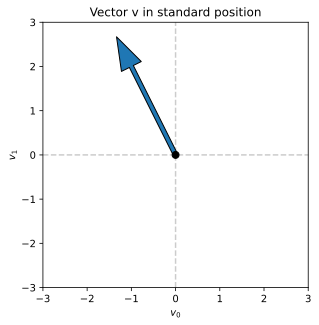

In [6]:
# create a vector
v = np.array([-1,2])

# plot that vector (and a dot for the tail)
plt.arrow(0,0,v[0],v[1],head_width=.5,width=.1)
plt.plot(0,0,'ko',markerfacecolor='k',markersize=7)

# add axis lines
plt.plot([-3,3],[0,0],'--',color=[.8,.8,.8],zorder=-1)
plt.plot([0,0],[-3,3],'--',color=[.8,.8,.8],zorder=-1)

# make the plot look nicer
plt.axis('square')
plt.axis([-3,3,-3,3])
plt.xlabel('$v_0$')
plt.ylabel('$v_1$')
plt.title('Vector v in standard position')
plt.show()

<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
/var/folders/mh/pw50z6011qq_vscwb8z4rldh0000gn/T/ipykernel_1452/1408465686.py:34: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Vector $\mathbf{v}$ in various locations')


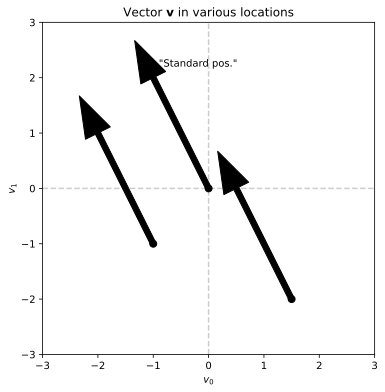

In [7]:
# A range of starting positions

startPos = [
            [0,0],
            [-1,-1],
            [1.5,-2]
            ]


# create a new figure
fig = plt.figure(figsize=(6,6))

for s in startPos:

  # plot that vector (and a dot for the tail)
  # note that plt.arrow automatically adds an offset to the third/fourth inputs
  plt.arrow(s[0],s[1],v[0],v[1],head_width=.5,width=.1,color='black')
  plt.plot(s[0],s[1],'ko',markerfacecolor='k',markersize=7)

  # indicate the vector in its standard position
  if s==[0,0]:
    plt.text(v[0]+.1,v[1]+.2,'"Standard pos."')


# add axis lines
plt.plot([-3,3],[0,0],'--',color=[.8,.8,.8],zorder=-1)
plt.plot([0,0],[-3,3],'--',color=[.8,.8,.8],zorder=-1)

# make the plot look nicer
plt.axis('square')
plt.axis([-3,3,-3,3])
plt.xlabel('$v_0$')
plt.ylabel('$v_1$')
plt.title('Vector $\mathbf{v}$ in various locations')
plt.savefig('Figure_01_01.png',dpi=300) # write out the fig to a file
plt.show()

# 3. 벡터의 합 -  Adding vectors

broadcasting 연산 기능을 집중 - 추후 K-평균 클러스터링 방식에서 적용되어 사용되는 예시를 뒤에서 볼 예정임

In [8]:
# Using 2D vectors here instead of 3D vectors in the book to facilitate visualization
# row vector 2개를 만들어서 합 연산을 수행함
v = np.array([1,2])
w = np.array([4,-6])
vPlusW = v+w

# print out all three vectors
# 결과 출력
print(v)
print(w)
print(vPlusW)

# 해당 부분에선 row/column의 여부를 집중하지말고 연산의 결과를 확인할 것
# Note that here we don't need to worry about vector orientation (row vs. column), 
# so for simplicity the vectors are created orientationless.

[1 2]
[ 4 -6]
[ 5 -4]


In [12]:
# Python의 broadcasting 연산 기능의 예시
# 앞서 본 개념에 의해서는 row vector와 column vector의 연산은 불가하다고 보는 것이 맞는데 Python에서 코드로 실행해보면 신기한 결과가 도출된다
# 이는 Python의 broadcasting 연산의 기능으로 row vector의 값을 각 low vector에 곱하여 다음 결과와 같은 값을 도출한다
# 자세한 설명은 추후에 보는 것으로 하고 우선, 결과값을 집중하자

v = np.array([[8, 11, 2]]) # 행 백터
w = np.array([[10, 20, 30]]).T # 열 벡터

print(v + w) # 합 연산

[[18 21 12]
 [28 31 22]
 [38 41 32]]


# 4.벡터의 뻴셈 - Subtracting vectors

In [13]:
# 이전에 선언해둔 벡터값으로 뻴셈을 수행하면? 
# Same v and w as above for comparison
vMinusW = v-w

# 동일하게, broadcasting 연산이 적용되어 나오는 결과를 확인이 가능하다 
# print out all three vectors 
print(v)
print(w)
print(vMinusW)

[[ 8 11  2]]
[[10]
 [20]
 [30]]
[[ -2   1  -8]
 [-12  -9 -18]
 [-22 -19 -28]]


# 5. 스칼라 벡터 곱셉 - Vector-scalar multiplication

In [14]:
# a scalar
# 스칼라 값은 값 그 자체를 의미하며 벡터도 어떤 행렬에 포함된 숫자도 아니다
s = -1.2

# a vector
# 행 벡터
b = np.array([3,4])

# print them
# 값 출력
print(b*s)

# Question: Does vector b need to be a numpy array? What happens if it's a list?
# 우선 당연한 이야기겠지만, 스칼라값이 -1.2로 고정된 경우에 b값이 배열인 경우에는 연산이 불가하다고 오류가 발생한다
# 배열에 정수를 곱하면 이는 반복 출력의 의미로 기존의 목적인 스칼라 벡터 곱셈이 불가능하다
# 따라서, 단순한 행 벡터만을 구현한다고 해도 반드시 np.array()를 통해서 벡터값으로 구현해야 연산이 가능하다

[-3.6 -4.8]


In [15]:
# Scalar-vector addition
# 스칼라 벡터 합 연산일 경우에는 동일하게 벡터값에 각각 스칼라 값을 더한다
# 선형대수학의 수학적 접근에서는 절대 불가한 연산이지만 Python의 수치값 처리 프로그램의 연산이니 알아만 두자
s = 3.5

print(v)
print(s+v)

[[ 8 11  2]]
[[11.5 14.5  5.5]]


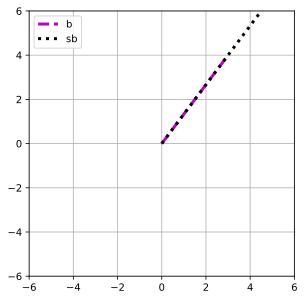

In [16]:
# plot
plt.plot([0,b[0]],[0,b[1]],'m--',linewidth=3,label='b')
plt.plot([0,s*b[0]],[0,s*b[1]],'k:',linewidth=3,label='sb')

plt.grid()
plt.axis('square')
plt.axis([-6,6,-6,6])
plt.legend()
plt.show()

<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
/var/folders/mh/pw50z6011qq_vscwb8z4rldh0000gn/T/ipykernel_1452/1256309741.py:24: SyntaxWarning: invalid escape sequence '\s'
  axs[i].set_title(f'$\sigma$ = {s:.2f}')


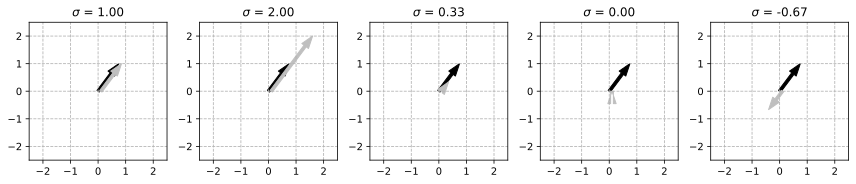

In [17]:
# Effects of different scalars

# a list of scalars:
scalars = [ 1, 2, 1/3, 0, -2/3 ]

baseVector = np.array([ .75,1 ])

# create a figure
fig,axs = plt.subplots(1,len(scalars),figsize=(12,3))
i = 0 # axis counter

for s in scalars:

  # compute the scaled vector
  v = s*baseVector

  # plot it
  axs[i].arrow(0,0,baseVector[0],baseVector[1],head_width=.3,width=.1,color='k',length_includes_head=True)
  axs[i].arrow(.1,0,v[0],v[1],head_width=.3,width=.1,color=[.75,.75,.75],length_includes_head=True)
  axs[i].grid(linestyle='--')
  axs[i].axis('square')
  axs[i].axis([-2.5,2.5,-2.5,2.5])
  axs[i].set(xticks=np.arange(-2,3), yticks=np.arange(-2,3))
  axs[i].set_title(f'$\sigma$ = {s:.2f}')
  i+=1 # update axis counter

plt.tight_layout()
plt.savefig('Figure_01_03.png',dpi=300)
plt.show()


해당 그래프를 보면 스칼라-벡타의 곱의 결과가 왜 중요한 지를 알 수 있다. 

스칼라는 방향값도 없으며 크기만 있기 때문에 벡터에 곱을 할 경우 방향성은 유지하며 그 값만 배로 곱해주는 기능을 하기에

스칼라값이 음수(반대 방향), 양수(같은 방향), 0(원점)인지에 따라서 상단의 그래프를 통해 어떻게 벡터값이 변하는지 확인이 가능하다

# 6. 벡터의 전치 (Vector transpose)

In [20]:
# Row vector
# 행 벡터 구현
r = np.array([ [1,2,3] ])

# orientationless array
# 방향성이 없는 배열
l = np.array([1,2,3])

In [24]:
# print out the vector, its transpose, and its double-transpose
# 행벡터 값 (원본)
print(r), print(' ')

# 전치 후 행벡터가 열벡터가 된 값을 출력
# Transpose the row vector
print(r.T), print(' ')

# 이중 전치 시 원상복구되는 결과를 출력
# double-transpose
print(r.T.T)

[[1 2 3]]
 
[[1]
 [2]
 [3]]
 
[[1 2 3]]


In [26]:
# Same for the orientationless array
# 위의 벡터값과 달리 방향성이 없는 배열의 경우에는 Transpose를 취해도 값이 같은 결과를 볼 수 있다
print(l), print(' ')
print(l.T), print(' ')
print(l.T.T)

[1 2 3]
 
[1 2 3]
 
[1 2 3]


# 7) norm - 기하학적 벡터의 크기값

In [20]:
v = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]) #row vector
v_dim = len(v) #수학적 차원을 반환
v_mag = np.linalg.norm(v) #norm값, 수학적 크기 또는 길이를 반환함

print("v의 차원은 {0}, norm은 {1}".format(v_dim, v_mag))

v의 차원은 9, norm은 16.881943016134134


# 8) dot product(내적 곱)는 분배적이다 -  The dot product is distributive

내적(dot product)는 선형대수학 전체에서 중요한 연산으로 합성곱(convolution), 상관관계(correlation), 푸리에 변환(Fourier transform), 행렬 곱셈(matrix multiplication), 선형 특징 추출, 신호 필터링 등 알고리즘의 기본이 되는 중요한 개념이다.

In [23]:
# 기본적인 내적의 곱은 Python에서 제공하는 numpy의 np.dot()를 통해서 간단하게 계산이 가능하다
v = np.array([1, 2, 3, 4])
w = np.array([5, 6, 7, 8])
np.dot(v, w) # 두 벡터의 내적값 계산

# 하지만 주의할 점은 np.dot()은 실제로는 벡터-내적을 구현하지 않았으며, 내적으로 이루어진 행렬 곱셈을 구현한 것으로
# 첫 입력이 행벡터, 두 번째 입력이 열벡터일 경우에만 내적값이 출력되는 특징이 있기에 이를 유의하고 사용해야 한다.

np.int64(70)

In [37]:
# just some random vectors...
# 랜덤한 행벡터들을 생성
v = np.array([ 0,1,2 ])
w = np.array([ 3,5,8 ])
u = np.array([ 13,21,34 ])

# 내적의 분배 법칙
# 간단하게 T는 Transpose의 약자로 식을 표현하면 
# aT(b+c) = aTb + aTc로 표현되는 특성을 이용하여 벡터의 덧셈을 설명하면 하단의 코드처럼 구현이 가능하다
res1 = np.dot( v, w+u ) # 방법 1
res2 = np.dot( v,w ) + np.dot( v,u ) # 방법 2

# show that they are equivalent
res1,res2

(np.int64(110), np.int64(110))

In [38]:
# 스칼라배를 진행한 벡터값을 이용해서 기존의 내적값과 변경 이후 내적값을 확인하면 스칼라배로 인하여 내적값이 커지는 것을 확인 가능하다

s = 10
v = v*s
res3 = np.dot(v, w) + np.dot(v, u)

res3 # 정확히 스칼라를 곱한 값만큼 내적값이 커짐 (당연하게도 0을 곱하면 내적값은 0이 나옴)

np.int64(1100)

해당 내용을 보면 dot product 즉 내적 곱의 경우에는 a1, a2, a3 * b1, b2, b3로 계산을 하면

a1b1, a2b2, a3b3로 계산값을 내는데 만약 vector가 3개라 하여도 값은 a1b1c1, a2b2c2, a3b3c3로 동일하게 나오며

계산 순서를 아무리 바꿔서 따로 해도 결과값은 같게 나온다는 것을 알 수 있다.

# Solutions to code exercises

# Exercise 1 : vector의 덧셈, 뻴셈의 기하학적 해석

<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
/var/folders/mh/pw50z6011qq_vscwb8z4rldh0000gn/T/ipykernel_1452/2349288520.py:20: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Vectors $\mathbf{v}$, $\mathbf{w}$, and $\mathbf{v+w}$')


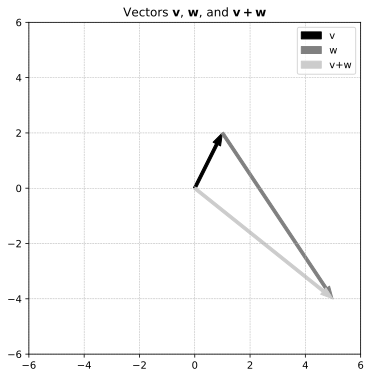

In [52]:
# vector값 생성 (그림 1-2에 맞게 벡터 생성)
v = np.array([1,2])
w = np.array([4,-6])
vPlusW = v+w


# vector 그래프에 구현
plt.figure(figsize=(6,6))

a1 = plt.arrow(0,0,v[0],v[1],head_width=.3,width=.1,color='k',length_includes_head=True)
a2 = plt.arrow(v[0],v[1],w[0],w[1],head_width=.3,width=.1,color=[.5,.5,.5],length_includes_head=True)
a3 = plt.arrow(0,0,vPlusW[0],vPlusW[1],head_width=.3,width=.1,color=[.8,.8,.8],length_includes_head=True)


# 그래프 그리기
plt.grid(linestyle='--',linewidth=.5)
plt.axis('square')
plt.axis([-6,6,-6,6])
plt.legend([a1,a2,a3],['v','w','v+w'])
plt.title('Vectors $\mathbf{v}$, $\mathbf{w}$, and $\mathbf{v+w}$')
plt.savefig('Figure_01_02a.png',dpi=300) # write out the fig to a file
plt.show()

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
/var/folders/mh/pw50z6011qq_vscwb8z4rldh0000gn/T/ipykernel_1452/1867500665.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Vectors $\mathbf{v}$, $\mathbf{w}$, and $\mathbf{v-w}$')


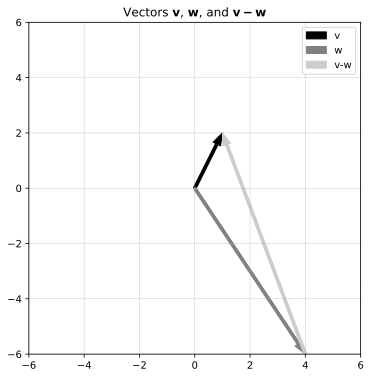

In [53]:
# vector difference
vMinusW = v-w


# now plot all three vectors
plt.figure(figsize=(6,6))

a1 = plt.arrow(0,0,v[0],v[1],head_width=.3,width=.1,color='k',length_includes_head=True)
a2 = plt.arrow(0,0,w[0],w[1],head_width=.3,width=.1,color=[.5,.5,.5],length_includes_head=True)
a3 = plt.arrow(w[0],w[1],vMinusW[0],vMinusW[1],head_width=.3,width=.1,color=[.8,.8,.8],length_includes_head=True)


# make the plot look a bit nicer
plt.grid(linestyle='--',linewidth=.5)
plt.axis('square')
plt.axis([-6,6,-6,6])
plt.legend([a1,a2,a3],['v','w','v-w'])
plt.title('Vectors $\mathbf{v}$, $\mathbf{w}$, and $\mathbf{v-w}$')
plt.savefig('Figure_01_02b.png',dpi=300)
plt.show()

# Exercise 2 : norm 식 코드 구현 후 np.linalg.norm()의 결과값과 비교

In [56]:
# norm 수식 코드로 구현
def normOfVect(v):
  return np.sqrt(np.sum(v**2))

# row vector를 통해 norm 수식 값 확인
w = np.array([0,0,1])
print( normOfVect(w) )

# random vector를 생성 후 norm 식 구현 함수와 np.linalg.norm() 값 확인
w = np.array([1,2,3]) # 난수로 백터를 생성해도 무관함
print( normOfVect(w), np.linalg.norm(w) )

1.0
3.7416573867739413 3.7416573867739413


# Exercise 3 : 입력받은 벡터와 같은 방향의 단위벡터 출력 함수 구현 (영벡터 input test)

In [62]:
# 입력 벡터를 기준으로 같은 방향 단위벡터 출력 함수 구현
def createUnitVector(v):
  # v벡터의 norm을 저장
  mu = np.linalg.norm(v)
  # 단위벡터를 반환 (v/norm(v))
  return v / mu

# 단위벡터 input
w = np.array([0,1,0])
print( createUnitVector(w) )

# 비단위벡터 input
w = np.array([0,3,0])
print( createUnitVector(w) )

# 비단위벡터를 생성하여 test 진행
w = np.array([13,-5,7])
uw = createUnitVector(w)
print( uw ), print(' ')
# 벡터의 norm 값 확인
print( np.linalg.norm(w),np.linalg.norm(uw) )

# 영벡터 값을 넣으면 단위벡터 값이 뭐가 나올까?
print('\n\n\n') #줄넘김
createUnitVector( np.zeros((4,1)) )

[0. 1. 0.]
[0. 1. 0.]
[ 0.83395039 -0.32075015  0.44905021]
 
15.588457268119896 0.9999999999999999






/var/folders/mh/pw50z6011qq_vscwb8z4rldh0000gn/T/ipykernel_1452/3076834603.py:6: RuntimeWarning: invalid value encountered in divide
  return v / mu


array([[nan],
       [nan],
       [nan],
       [nan]])

# Exercise 4 : 벡터 입력, 원하는 벡터의 크기 입력 받아서 동일한 방향의 벡터 생성 함수 작성

In [65]:
# 함수 정의
def createMagVector(v,mag):
  # 입력 받은 벡터의 norm값 계산
  mu = np.linalg.norm(v)
  # 동일한 방향의 단위벡터 생성 및 반환
  return mag * v / mu #원하는 벡터의 크기를 mag값을 기존 단위벡터 구하는 식에 곱해주면 원하는 크기의 단위 벡터를 만들 수 있다.

#임의 벡터를 활용하여 크기 4의 단위벡터 생성 test
w = np.array([1,0,0])
mw = createMagVector(w,4)
print( mw )

# 임의 벡터의 norm값과 생성된 크기 4값의 단위 벡터의 norm값 확인
print( np.linalg.norm(w),np.linalg.norm(mw) )


[4. 0. 0.]
1.0 4.0


# Exercise 5 : 내장함수 및 메서드 없이 row vector를 column vector로 transpose 진행하는 과정을 for 루프를 통해 구현

In [68]:
# column vector로 transpose 시킬 row vector 생성
v = np.array([[1,2,3]])

# column vector를 0으로 초기화
vt = np.zeros((3,1))

# 인덱스 값을 이용하여 v -> vt 
for i in range(v.shape[1]):
  vt[i,0] = v[0,i]

# 변환 결과 확인
print(v), print(' ')
print(vt)

# 결과값을 보면 두 벡터의 원소가 v(int), vt(float)임을 확인이 가능하다
# 이런 현상이 발생하는 이유는 v벡터는 선언 당시 int형으로 선언되었지만, vt는 np.zeros를 통해 0으로 column 구조에 맞게 float 타입으로 초기화되기 때문이며
# 이런 결과가 싫다면, for문에서 인덱스를 통해서 vector의 element들을 넣을 때 값을 넣고나서 int형으로 바꾸면 해결됨

[[1 2 3]]
 
[[1.]
 [2.]
 [3.]]


# Exercise 6 : 

In [45]:
# some vector
c = np.random.randn(5)

# squared norm as dot product with itself
sqrNrm1 = np.dot(c,c)

# squared norm via our function from exercise 1
sqrNrm2 = normOfVect(c)**2

# print both to confirm they're the same
print( sqrNrm1 )
print( sqrNrm2 )

0.8612482567279035
0.8612482567279036


# Exercise 7

In [46]:
# dimensionality
n = 11

# some random column vectors
a = np.random.randn(n,1)
b = np.random.randn(n,1)

# dot products both ways
atb = np.sum(a*b)
bta = np.sum(b*a)

# they're equal if their difference is 0
atb - bta

# For an extra challenge, see what happens when you use np.dot() to compute the dot products.

np.float64(0.0)

# Exercise 8

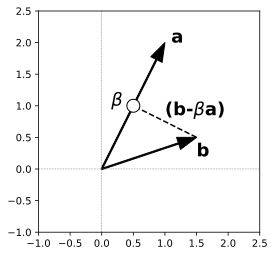

In [47]:
# the vectors a and b
a = np.array([1,2])
b = np.array([1.5,.5])

# compute beta
beta = np.dot(a,b) / np.dot(a,a)

# compute the projection vector (not explicitly used in the plot)
projvect = b - beta*a


# draw the figure
plt.figure(figsize=(4,4))

# vectors
plt.arrow(0,0,a[0],a[1],head_width=.2,width=.02,color='k',length_includes_head=True)
plt.arrow(0,0,b[0],b[1],head_width=.2,width=.02,color='k',length_includes_head=True)

# projection vector
plt.plot([b[0],beta*a[0]],[b[1],beta*a[1]],'k--')

# projection on a
plt.plot(beta*a[0],beta*a[1],'ko',markerfacecolor='w',markersize=13)

# make the plot look nicer
plt.plot([-1,2.5],[0,0],'--',color='gray',linewidth=.5)
plt.plot([0,0],[-1,2.5],'--',color='gray',linewidth=.5)

# add labels
plt.text(a[0]+.1,a[1],'a',fontweight='bold',fontsize=18)
plt.text(b[0],b[1]-.3,'b',fontweight='bold',fontsize=18)
plt.text(beta*a[0]-.35,beta*a[1],r'$\beta$',fontweight='bold',fontsize=18)
plt.text((b[0]+beta*a[0])/2,(b[1]+beta*a[1])/2+.1,r'(b-$\beta$a)',fontweight='bold',fontsize=18)

# some finishing touches
plt.axis('square')
plt.axis([-1,2.5,-1,2.5])
plt.show()

# Exercise 9

[-0.06123984  0.85641407]
[-0.06123984  0.85641407]
-1.3877787807814457e-17


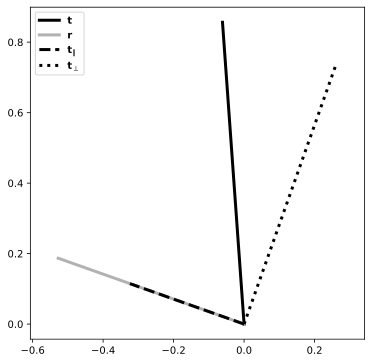

In [48]:
# generate random R2 vectors (note: no orientation here! we don't need it for this exercise)
t = np.random.randn(2)
r = np.random.randn(2)

# the decomposition
t_para = r * (np.dot(t,r) / np.dot(r,r))
t_perp = t - t_para

# confirm that the two components sum to the target
print(t)
print( t_para+t_perp )

# confirm orthogonality (dot product must be zero!)
print( np.dot(t_para,t_perp) )
# Note about this result: Due to numerical precision errors, 
#   you might get a result of something like 10^-17, which can be interpretd as zero.



# draw them!
plt.figure(figsize=(6,6))

# draw main vectors
plt.plot([0,t[0]],[0,t[1]],color='k',linewidth=3,label=r'$\mathbf{t}$')
plt.plot([0,r[0]],[0,r[1]],color=[.7,.7,.7],linewidth=3,label=r'$\mathbf{r}$')

# draw decomposed vector components
plt.plot([0,t_para[0]],[0,t_para[1]],'k--',linewidth=3,label=r'$\mathbf{t}_{\|}$')
plt.plot([0,t_perp[0]],[0,t_perp[1]],'k:',linewidth=3,label=r'$\mathbf{t}_{\perp}$')

plt.axis('equal')
plt.legend()
plt.savefig('Figure_01_08.png',dpi=300)
plt.show()

# Exercise 10

In [49]:
# Replace t_para in the previous exercise with the line below:
t_para = r * (np.dot(t,r) / np.dot(t,t))